a) Find the conformal mapping
---
The Joukowski transform $g(\zeta)=\frac{1}{2}(\zeta+\frac{1}{\zeta})$ maps the fluid in a unit disc $|\zeta|<1$ in the $\zeta$-plane to the fluid outside a finite plate $-1<Re(z')<1, Im(z')=0$ in the $z'-plane$, as we had discussed in lectures. We write this as $z' = \frac{1}{2}(\zeta+\frac{1}{\zeta})$.

We then take the inverse of $z'$ and write $z=\frac{1}{z'}$. The finite plate $-1<z'<1$ now maps to an infinite wall along the real axis with a gap $-1<Re(z)<1, Im(z)=0$ in the $z$-plane. 

These two transformations together give the answer to the question:

$\frac{1}{z} = \frac{1}{2}(\zeta+\frac{1}{\zeta}) \tag{1}$

$ z =f(\zeta)=\frac{2\zeta}{\zeta^2+1} \tag{2}$






b) Find the inverse mapping to a)
---
Rewrite $(2)$ as 
$z\zeta^2-2\zeta+z=0 \tag{3}$

Solution using the well-known formula for solving quadratic equations:
$\zeta = \frac{2\pm \sqrt{4-4z^2}}{2z} \tag{4}$
$\zeta = \frac{1- \sqrt{1-z^2}}{z} \tag{5}$
The negative square root is taken to ensure the image of the origin in the $z$-plane is inside the unit disc in $\zeta$-plane.



c) Complex potential due to a point vortex
---
The complex potential due to a point vortex at $\zeta_a$ inside the unit disc is well-known.

$w(\zeta) = G_0(\zeta,\zeta_a)=\frac{-i\Gamma}{2\pi}log(\frac{\zeta-\zeta_a}{|\zeta_a|(\zeta-(\bar{\zeta})^{-1})}) \tag{6}$

where $\Gamma$ is the circulation and $\bar{\zeta}$ is the complex conjugate of $\zeta$.

In the $z$-plane, the complex potential is simply $w(\zeta(z))$. (Eq.5) is the explict expression for $\zeta$ in terms of $z$. One can substitute (Eq.5) into (Eq.6) to get the expression of $w(z)$, but this is not necessary in computation.

We can visualise the streamlines due to this point vortex:

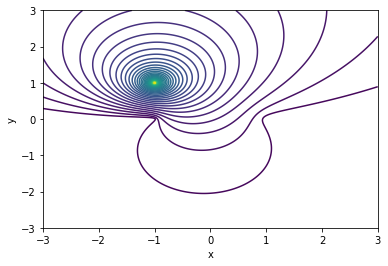

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def w(z, za, gamma=1):
    '''
    vortex potential in z-plane
    '''
    zeta = (1-(1-z**2)**.5)/z
    zeta_a = (1-(1-za**2)**.5)/za

    zetaa_mol = np.absolute(zeta_a)
    zetaa_ = np.conj(zeta_a)

    return gamma *-1j/2./np.pi*np.log((zeta-zeta_a)/zetaa_mol/(zeta-1./zetaa_))

# Construct 2d coordinates for streamline computation
node_number = 600
edge = 3
x, y = np.meshgrid( np.linspace(-edge, edge, node_number), np.linspace(-edge, edge, node_number) )
z = x + 1j*y

# position of the point vortex
za = -1+1j

# Plot
fig, ax = plt.subplots(subplot_kw=dict(polar=False))
ax.set_xlabel('x')
ax.set_ylabel('y')
flow_field = plt.contour(x, y, w(z, za).imag, levels=60)

d) Trajectory of a single point vortex
---
The Hamiltonian for the point vortex in the $\zeta$-plane is given by:

$H^{(\zeta)}(\zeta_a)=Im[\Gamma W_B(\zeta_a,t)]+\frac{\Gamma^2}{2}Im[g(\zeta_a,\zeta_a)] \tag{7}$

where $W_B$ is the complex potential for background flow and $g$ is an analytic function defined from the expression:

$G_0(\zeta,\zeta_a)=\frac{-i}{2\pi}log(\zeta-\zeta_a) + g(\zeta,\zeta_a) \tag{8}$

In this case,

$$
\begin{align}
g(\zeta,\zeta_a) &= \frac{i}{2\pi}log(|\zeta_a|(\zeta-(\bar{\zeta})^{-1})) \tag{9} \\
W_B&=0
\end{align}
$$

Compute $H^{(\zeta)}(\zeta_a)$ using (Eq.9):
$$
\begin{align}
H^{(\zeta)}(\zeta_a)&=\frac{\Gamma^2}{2}Im[\frac{i}{2\pi}log(|\zeta_a|(\zeta_a-(\bar{\zeta_a})^{-1}))] \\
H^{(\zeta)}(\zeta_a)&=\frac{\Gamma^2}{2}Re[\frac{1}{2\pi}log(|\zeta_a|(\zeta_a-(\bar{\zeta_a})^{-1}))] \\
H^{(\zeta)}(\zeta_a)&=\frac{\Gamma^2}{4\pi}log|(|\zeta_a|\frac{(\zeta_a\bar{\zeta_a}-1)}{\bar{\zeta_a}})| \\
H^{(\zeta)}(\zeta_a)&=\frac{\Gamma^2}{4\pi}log(|\zeta_a|\frac{|(\zeta_a\bar{\zeta_a}-1)|}{|\bar{\zeta_a}|}) \\
H^{(\zeta)}(\zeta_a)&=\frac{\Gamma^2}{4\pi}log(1-|\zeta_a|^2) \\
\tag{10}
\end{align}
$$

The Hamiltonian function in the $z$-plane is given by the Kirchhoff-Routh path function:
$H^{(z)}(z_a) = H^{(\zeta)}(\zeta_a) + \frac{\Gamma^2}{4\pi}log|f'(\zeta_a)| \tag{11}$

Compute $f'(\zeta_a)$ using (Eq.2):
$f'(\zeta_a)=\frac{2-2\zeta_a^2}{(1+\zeta_a^2)^2} \tag{12}$

Substitute (Eq.10) and (Eq.12) into (Eq.11):
$$
\begin{align}
H^{(z)}(z_a) &= \frac{\Gamma^2}{4\pi}log(1-|\zeta_a|^2) + \frac{\Gamma^2}{4\pi}log|\frac{2-2\zeta_a^2}{(1+\zeta_a^2)^2}| \\
H^{(z)}(z_a) &=\frac{\Gamma^2}{4\pi}log|(1-|\zeta_a|^2)\frac{2-2\zeta_a^2}{(1+\zeta_a^2)^2}| \\
\tag{13}
\end{align}
$$

The Hamiltonian remains constant. Thus, the trajectories are given by 
$$
\frac{\Gamma^2}{4\pi}log|(1-|\zeta_a|^2)\frac{2-2\zeta_a^2}{(1+\zeta_a^2)^2}|=const. \\
\tag{14}
$$
or 
$$
|(1-|\zeta_a|^2)\frac{2-2\zeta_a^2}{(1+\zeta_a^2)^2}|=const_2. \\
\tag{15}
$$

Again, we can substitute (Eq.5) into the above the equations to obtain the trajectory function explicitly in $z$, but this is not necessary in computation.

We can plot the contours of the Hamiltonian in (Eq.13) to visualise the trajectories:

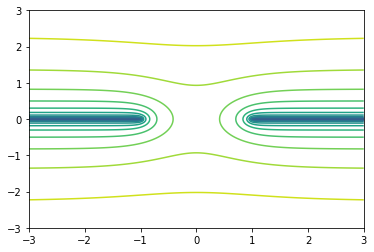

In [2]:
def Hamiltonian( z, gamma=1, m=1 ):
    '''
    Hamiltonian in z-plane
    '''
    zeta = (1-(1-z**2)**.5)/z
    zeta_mol = np.abs(zeta)

    return gamma**2/4/np.pi * np.log( (1-zeta_mol**2) )+ \
           gamma**2/4/np.pi * np.log( np.abs( (2-2*zeta**2) / (1+zeta**2)**2 ) )

H_c = plt.contour(x, y, Hamiltonian(z), levels=15)

e) Critical height
---
From (Eq.5) we observe that $\zeta=f^{-1}(z)$ is an odd function in $z$.
From (Eq.15) the trajectory function is an even function in $\zeta_a$.

We can then conclude that the trajectory function is an even function in $z$, i.e. the trajectories are symmetric about both x and y-axes.

With this information, if there exists a critical height, the trajectory associated with this height must past through the origin.

For $z=0+0i$, the corresponding $\zeta=0+0i$ (This is the benefit of choosing the negative square root earlier).

Substitute $\zeta=0+0i$ into (Eq.14):
$$
\begin{align}
\frac{\Gamma^2}{4\pi}log|(1-0)\frac{2-0}{(1+0)^2}|&=const. \\
const.&=\frac{\Gamma^2}{4\pi}log2
\tag{16}
\end{align}
$$

The corresponding constant in (Eq.15) is $const_2=2$.

We can plot this specific contour of the Hamiltonian in (Eq.13):

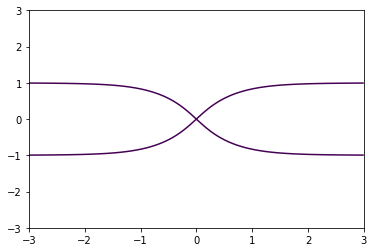

In [3]:
H_cc = plt.contour(x, y, Hamiltonian(z), [1./4./np.pi*np.log(2)])

The associated trajectory passes through the origin as expected.

The critical height $h_{crit}=1$ automatically appears in the plot.

f1) Mapping from the upper half plane to fluid region with a gap in a wall
---
Consider the mapping $z=g(\zeta')=\frac{1}{2}(\zeta'+\frac{1}{\zeta'})$ and the inverse $\zeta'=g^{-1}(z)=z-\sqrt{z^2-1}$.

We have seen previously the unit circle boundary $|\zeta|=1$ is mapped to a finite plate $-1<Re(z)<1, Im(z)=0$, and the fluid region in the upper semi-disc is mapped to the lower half z-plane. The rest of the upper half $\zeta'$-plane is mapped to the upper half z-plane by inspection. The gap $-1<Re(z)<1, Im(z)=0$ now corresponds to the line segment $S$ in the $\zeta$ plane. This is shown schematically.

We conclude that $g(\zeta')$ maps the upper half $\zeta'$-plane to the fluid region outside the inifite wall with a gap in the $z$-plane.

This is useful to find the complex potential for the mass flux.

f2) Complex potential for a mass flux background flow
---

The streamlines for a mass flux must all go through the gap in only one direction, e.g. from up to down. In the mean time, the two infinite walls must be streamlines. It is not easy to guess the streamfunction in the z-plane that satisfies the above criteria.

Let us consider streamlines in the $\zeta'$-plane, using the mapping we derived in f1). In the $\zeta'$-plane we want to find streamlines passing through the line segment $S$ in one direction and aligned along the real axis (the inifinite wall). 

One obvious configuration is that all streamlines going radially outward from the origin, i.e. we want to find a function whose contour for its imaginary part is going radially outward. One natural solution is $log(\zeta')$, whose imaginary part is $arg[\zeta']$ and has contours all going radially from the origin, as we can see below:

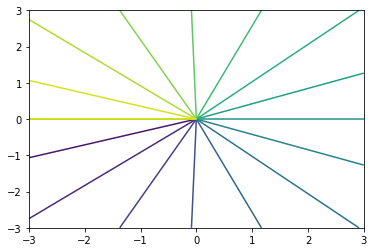

In [4]:
H_c_log = plt.contour(x, y, np.log(z).imag, levels=15)

Now we can write down the complex potential for a mass flux in $\zeta'$-plane:
$$
w_b(\zeta')=Alog(\zeta')
\tag{17}
$$
where $A$ is a constant.

The mass flux between two streamlines are given by the difference of their heights, i.e. the values of streamfunction on the streamlines. Thus, the total mass flux through the line segment $S$ is given by $A(\pi-0)$. In this exercise, $m=-A(\pi-0)$. The minus sign is taken because the mass flux is from upper to lower region. We can determine the constant $A$ and write the complex potential in the $z$-plane using $\zeta'=g^{-1}(z)=z-\sqrt{z^2-1}$:
$$
\begin{align}
w_b(\zeta')&=-\frac{m}{\pi}log(\zeta') \\
w_b(z)&=-\frac{m}{\pi}log(z-\sqrt{z^2-1})
\tag{18}
\end{align}
$$

The combined complex potential due to a point vortex at $z_a$ and mass flux is simply the sum of the two:
$\hat{w}(z)=w(z) + w_b(z) \tag{19}$
where the explicit form of $w(z)$ can be found by substituting (Eq.5) into (Eq.6) as we discussed earlier.

We can visualise the streamline by plotting the imaginary part of $w_b(z)$ to justify our solution:


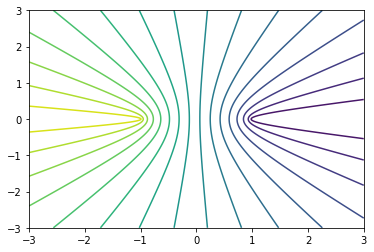

In [5]:
def wb( z, m=.1 ):
    '''
    background complex potential in z plane
    '''
    return -m/np.pi * np.log(z-(z**2-1)**.5)

w_b = plt.contour(x, y, np.abs(wb(z).imag), levels=17)

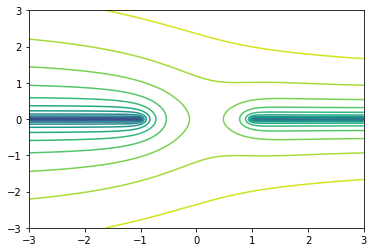

In [6]:
def Hamiltonian_b( z, gamma=1, m=-.1 ):
    '''
    Hamiltonian with background flow in z-plane
    '''
    zeta = (1-(1-z**2)**.5)/z
    zeta_mol = np.abs(zeta)

    return gamma**2/4/np.pi * np.log( (1-zeta_mol**2) )+ \
           gamma**2/4/np.pi * np.log( np.abs( (2-2*zeta**2) / (1+zeta**2)**2 ) )+ \
           gamma*m*np.abs((wb(z, m)/m).imag)

H_cb = plt.contour(x, y, Hamiltonian_b(z, gamma=1, m=-.1), levels=15)

g) Changes to $h_{crit}$
---
The mass flux flow increases $h_{crit}$, i.e. the vortex is more likely to penetrate the wall. This is consistent with our intuition.

If $\frac{m}{\Gamma}>>1$ the trajectories of the point vortex will follow the streamlines of the mass flux flow field. In this scenario, the point vortex will always penetrate the gap regardless of its initial height, and $h_{crit}$ is undefined.
